In [111]:
import pandas as pd
import numpy as np

In [112]:
df = pd.read_csv("dataset7.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [114]:
notint = df["BareNuc"] != type(int)

df[notint]["BareNuc"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [115]:
# df["BareNuc"] = pd.to_numeric(df["BareNuc"], errors="ignore")
df.drop(df.loc[df["BareNuc"]=="?"].index, inplace=True)

In [116]:
to_replace = {
    "Class":
        {2: "Benign", 4: "Malignant"}
}
df.replace(to_replace, inplace=True)

# clas = pd.get_dummies(df["Class"], drop_first=False)
y = df["Class"]
# y = clas
print(y.head())

X = df.copy(deep=True)
X = X.drop(["ID", "Class"], axis=1)
print(X.head())

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Class, dtype: object
   Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
0      5         1          1        1            2       1           3   
1      5         4          4        5            7      10           3   
2      3         1          1        1            2       2           3   
3      6         8          8        1            3       4           3   
4      4         1          1        3            2       1           3   

   NormNucl  Mit  
0         1    1  
1         2    1  
2         1    1  
3         7    1  
4         1    1  


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [120]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix as pcm

print(accuracy_score(y_test, y_pred))

0.9635036496350365


In [126]:
print(cm(y_test, y_pred))

[[79  4]
 [ 1 53]]


TP    FP

FN    TN

- Positive (P): Observation is positive (eg. is a dog).
- Negative (N): Observation is not positive (eg. is not a dog).
- True Positive (TP): Outcome where the model correctly predicts the positive class.
- True Negative (TN): Outcome where the model correctly predicts the negative class.
- False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly - predicts the positive class when it is actually negative.
- False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly - predicts the negative class when it is actually positive.

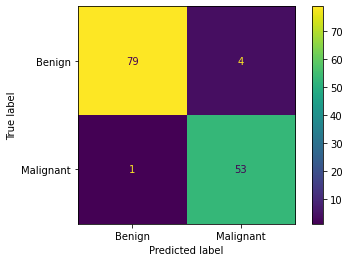

In [128]:
pcm(classifier, X_test, y_test)

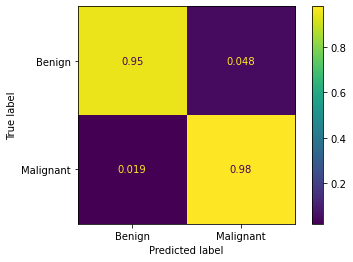

In [130]:
pcm(classifier, X_test, y_test, normalize="true")